<a href="https://colab.research.google.com/github/manojvenaram/TSA_EXP9/blob/main/tieseriesexp9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


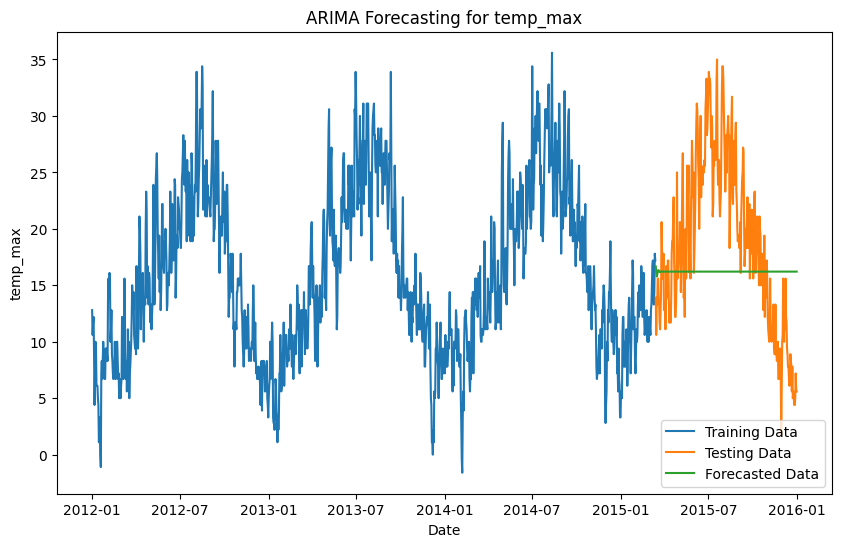

Root Mean Squared Error (RMSE): 7.8419343065484215


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("/content/seattle-weather.csv")

# Convert 'Date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set 'Date' column as index
data.set_index('date', inplace=True)

# Define a function for ARIMA modeling
def arima_model(data, target_variable, order):
    # Split data into training and testing sets (e.g., 80% train, 20% test)
    train_size = int(len(data) * 0.8)
    train_data, test_data = data[:train_size], data[train_size:]

    # Fit ARIMA model
    model = ARIMA(train_data[target_variable], order=order)
    fitted_model = model.fit()

    # Forecast
    forecast = fitted_model.forecast(steps=len(test_data))

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_data[target_variable], forecast))

    # Plot actual vs forecasted values
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data[target_variable], label='Training Data')
    plt.plot(test_data.index, test_data[target_variable], label='Testing Data')
    plt.plot(test_data.index, forecast, label='Forecasted Data')
    plt.xlabel('Date')
    plt.ylabel(target_variable)
    plt.title('ARIMA Forecasting for ' + target_variable)
    plt.legend()
    plt.show()

    # Print RMSE
    print("Root Mean Squared Error (RMSE):", rmse)

# Example usage
arima_model(data, 'temp_max', order=(5,1,0))  # Adjust the order as needed
